## House Price Prediction

**Member:**<br>
Jesinth Nalini<br>

**Business Objectives:**<br>
We need to model the price of houses with the available independent variables. <br><br>

This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.<br>

In [1]:
# To ignore Warnings

import warnings
warnings.filterwarnings('ignore')

####  Import all required packages

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

####  Import all required regression packages

In [3]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import Pipeline

# Import RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso

####  Import and read dataset

In [4]:
os.chdir(r"D:\Upgrad\House_Price")

In [5]:
housedata = pd.read_csv('train.csv', encoding = 'utf-8')
housedata.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

####  Inspect Housing dataframe

In [6]:
print("Info:") 
print(housedata.info())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  Ov

In [7]:
print("Shape:") 
print(housedata.shape)

Shape:
(1460, 81)


In [8]:
print("Null Values:")
print(housedata.isnull().any())

Null Values:
Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool


In [9]:
print("Description Analysis")
housedata.describe()

Description Analysis


Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [10]:
housedata.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

### Data Cleaning

**Missing value in percentage (%)**

In [11]:
missing = round(100*(housedata.isnull().sum()/len(housedata.index)), 2)
missing.loc[missing > 0]

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

**Columns with more than 50% missing values**

In [12]:
columns_with_missing_values = list(missing[missing >= 50].index)

len(columns_with_missing_values)

4

**Dropping columns with more than 50% missing values**

In [13]:
housedata = housedata.drop(columns_with_missing_values,axis=1)
housedata.shape

(1460, 77)

**Understand the missing value in detail**

In [14]:
missing = round(100*(housedata.isnull().sum()/len(housedata.index)), 2)
missing[missing != 0]

LotFrontage     17.74
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
dtype: float64

**Duplicate column check**

In [15]:
sum(housedata.duplicated(subset = 'Id')) == 0

True

**check for null values in all categorical columns**

In [16]:
housedata.select_dtypes(include='object').isnull().sum()[housedata.select_dtypes(include='object').isnull().sum()>0]

MasVnrType        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

**Impute the categorical variables with 'None'**

In [17]:
# Replace NA with None for the missing values: 

for col in ('MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Electrical'):
    
    housedata[col]=housedata[col].fillna('None')

#### Drop columns having more than 85% (1460*85/100) of specific value

In [18]:
#Use method getHighCategoricalValueCounts to get the column names having 85% of specific values

def getHighCategoricalValueCounts():
    column = []
    categorical_columns = housedata.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(housedata[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighCategoricalValueCounts()

In [19]:
# Remove column with skewed data

housedata.drop(columnsToBeRemoved, axis = 1, inplace = True)

housedata.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood BldgType HouseStyle  ...  OpenPorchSF  EnclosedPorch  \
0      CollgCr     1Fam     2Story  ...           61              0   
1      Veenker     1Fam     1Story  ...            0              0   
2      CollgCr     1Fam     2Story  ...           42              0   
3      Crawfor     1Fam     2Story  ...           35            272   
4      NoRidge     1Fam     2Story  ...           84              0   

   3SsnPorch  ScreenPorch PoolArea MiscVal MoSold YrSold  SaleCondition  \
0          0            0        0       0      2   2008         Normal   
1          0            0        0       0      5   2007         Normal   
2          0            0        0       0      9   2008         Normal   
3          0            0        0       0      2   2006        Abnorml   
4          0            0        0       0     12   2008         Normal   

  SalePrice  
0    208500  
1    181500  
2    223500  
3    140000  
4    250000  

[5 rows x 59 columns]

In [20]:
# Check the data for null values in categorical field - to double check

housedata.select_dtypes(include='object').isnull().sum()[housedata.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

In [21]:
# Check the data for null values in numeric field

housedata.select_dtypes(include=['int64','float']).isnull().sum()[housedata.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [22]:
# Replace null with median values in LotFrontage and MasVnrArea

housedata['LotFrontage'] = housedata['LotFrontage'].replace(np.nan, housedata['LotFrontage'].median())
housedata['MasVnrArea'] = housedata['MasVnrArea'].replace(np.nan, housedata['MasVnrArea'].median())

In [23]:
# For GarageYrBlt 5% of the missing value we will replace with median 0 and treating 0 as old, 1 as new

housedata["GarageYrBlt"].fillna(housedata["GarageYrBlt"].median(), inplace=True)

#housingInfo['GarageYrBlt']=housingInfo['GarageYrBlt'].fillna(0)
#housingInfo['GarageYrBlt'] = housingInfo['GarageYrBlt'].astype(int)

**Preparing Derived Column with the existing information**

In [24]:
# IsRemodelled is derived column based on remodelled and built years

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
# BuiltOrRemodelledAge is a derived column to determine the building age at the time of sale

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']

# OldOrNewGarage is  a derived column to indicate Garage is old or new, if GarageYrBlt < 2K is old (0) else new(1). 

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1


housedata['PropAge'] = (housedata['YrSold'] - housedata['YearBuilt'])

housedata['IsRemodelled'] = housedata.apply(checkForRemodel, axis=1)

housedata['BuiltOrRemodelAge'] = housedata.apply(getBuiltOrRemodelAge, axis=1)

housedata['OldOrNewGarage'] = housedata['GarageYrBlt'].apply(getGarageConstructionPeriod)
 
housedata.head()  

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood BldgType HouseStyle  ...  PoolArea  MiscVal  MoSold  YrSold  \
0      CollgCr     1Fam     2Story  ...         0        0       2    2008   
1      Veenker     1Fam     1Story  ...         0        0       5    2007   
2      CollgCr     1Fam     2Story  ...         0        0       9    2008   
3      Crawfor     1Fam     2Story  ...         0        0       2    2006   
4      NoRidge     1Fam     2Story  ...         0        0      12    2008   

  SaleCondition SalePrice PropAge IsRemodelled  BuiltOrRemodelAge  \
0        Normal    208500       5            0                  5   
1        Normal    181500      31            0                 31   
2        Normal    223500       7            1                  6   
3       Abnorml    140000      91            1                 36   
4        Normal    250000       8            0                  8   

  OldOrNewGarage  
0              1  
1              0  
2              1  
3              0  
4              1  

[5 rows x 63 columns]

In [25]:
# Drop columns not in use as we have derived columns as replacement

housedata.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [26]:
# Drop the following columns that have more than 85% values associated to a specific value


def getHighNumericalValueCounts():
    column = []
    numerical_columns = housedata.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(housedata[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
housedata.drop(columnsToBeRemoved, axis = 1, inplace = True)

# MoSold has no use in our analysis

housedata.drop(['MoSold'], axis = 1, inplace = True)

housedata.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood BldgType HouseStyle  ...  GarageCars  GarageArea WoodDeckSF  \
0      CollgCr     1Fam     2Story  ...           2         548          0   
1      Veenker     1Fam     1Story  ...           2         460        298   
2      CollgCr     1Fam     2Story  ...           2         608          0   
3      Crawfor     1Fam     2Story  ...           3         642          0   
4      NoRidge     1Fam     2Story  ...           3         836        192   

  OpenPorchSF SaleCondition SalePrice  PropAge IsRemodelled BuiltOrRemodelAge  \
0          61        Normal    208500        5            0                 5   
1           0        Normal    181500       31            0                31   
2          42        Normal    223500        7            1                 6   
3          35       Abnorml    140000       91            1                36   
4          84        Normal    250000        8            0                 8   

  OldOrNewGarage  
0              1  
1              0  
2              1  
3              0  
4              1  

[5 rows x 49 columns]

In [27]:
# check for percentage of null values in each column

percent_missing = round(100*(housedata.isnull().sum()/len(housedata.index)), 2)
print(percent_missing)

Id                   0.0
MSSubClass           0.0
MSZoning             0.0
LotFrontage          0.0
LotArea              0.0
LotShape             0.0
LotConfig            0.0
Neighborhood         0.0
BldgType             0.0
HouseStyle           0.0
OverallQual          0.0
OverallCond          0.0
RoofStyle            0.0
Exterior1st          0.0
Exterior2nd          0.0
MasVnrType           0.0
MasVnrArea           0.0
ExterQual            0.0
Foundation           0.0
BsmtQual             0.0
BsmtExposure         0.0
BsmtFinType1         0.0
BsmtFinSF1           0.0
BsmtUnfSF            0.0
TotalBsmtSF          0.0
HeatingQC            0.0
1stFlrSF             0.0
2ndFlrSF             0.0
GrLivArea            0.0
BsmtFullBath         0.0
FullBath             0.0
HalfBath             0.0
BedroomAbvGr         0.0
KitchenQual          0.0
TotRmsAbvGrd         0.0
Fireplaces           0.0
FireplaceQu          0.0
GarageType           0.0
GarageFinish         0.0
GarageCars           0.0


In [28]:
# Checking outliers using percentiles

housedata.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    69.863699   10516.828082     6.099315   
std     421.610009    42.300571    22.027677    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
90%    1314.100000   120.000000    92.000000   14381.700000     8.000000   
95%    1387.050000   160.000000   104.000000   17401.150000     8.000000   
99%    1445.410000   190.000000   137.410000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond   MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean      5.575342   103.117123   443.639726   567.240411  1057.429452  ...   
std       1.112799   180.731373   456.098091   441.866955   438.705324  ...   
min       1.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       5.000000     0.000000     0.000000   223.000000   795.750000  ...   
50%       5.000000     0.000000   383.500000   477.500000   991.500000  ...   
75%       6.000000   164.250000   712.250000   808.000000  1298.250000  ...   
90%       7.000000   335.000000  1065.500000  1232.000000  1602.200000  ...   
95%       8.000000   456.000000  1274.000000  1468.000000  1753.000000  ...   
99%       9.000000   791.280000  1572.410000  1797.050000  2155.050000  ...   
max       9.000000  1600.000000  5644.000000  2336.000000  6110.000000  ...   

        Fireplaces   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.613014     1.767123   472.980137    94.244521    46.660274   
std       0.644666     0.747315   213.804841   125.338794    66.256028   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000   334.500000     0.000000     0.000000   
50%       1.000000     2.000000   480.000000     0.000000    25.000000   
75%       1.000000     2.000000   576.000000   168.000000    68.000000   
90%       1.000000     3.000000   757.100000   262.000000   130.000000   
95%       2.000000     3.000000   850.100000   335.000000   175.050000   
99%       2.000000     3.000000  1002.790000   505.460000   285.820000   
max       3.000000     4.000000  1418.000000   857.000000   547.000000   

           SalePrice      PropAge  IsRemodelled  BuiltOrRemodelAge  \
count    1460.000000  1460.000000   1460.000000        1460.000000   
mean   180921.195890    36.547945      0.476712          22.950000   
std     79442.502883    30.250152      0.499629          20.640653   
min     34900.000000     0.000000      0.000000          -1.000000   
25%    129975.000000     8.000000      0.000000           4.000000   
50%    163000.000000    35.000000      0.000000          14.000000   
75%    214000.000000    54.000000      1.000000          41.000000   
90%    278000.000000    84.000000      1.000000          56.000000   
95%    326100.000000    91.000000      1.000000          58.000000   
99%    442567.010000   110.410000      1.000000          60.000000   
max    755000.000000   136.000000      1.000000          60.000000   

       OldOrNewGarage  
count     1460.000000  
mean         0.275342  
std          0.446840  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          1.000000  
90%          1.000000  
95%          1.000000  
99%          1.000000  
max          1.000000  

[11 rows x 28 columns]

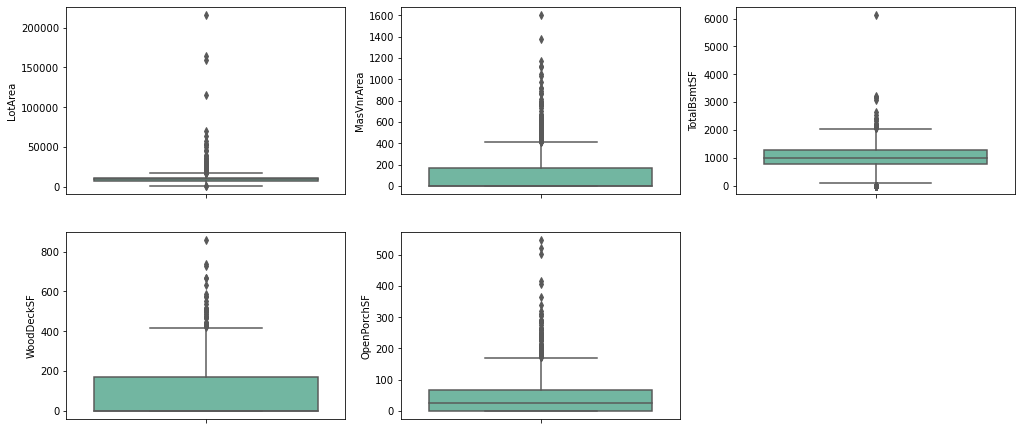

In [29]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set2', data = housedata)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set2', data = housedata)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set2', data = housedata)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set2', data = housedata)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set2', data = housedata)
plt.show()

**Method to remove outliers**

In [30]:
# Removing values beyond 99% for LotArea, MasVnrArea, TotalBsmtSF, WoodDeckSF, OpenPorchSF

quartile_LotArea = housedata['LotArea'].quantile(0.99)
housedata = housedata[housedata["LotArea"] < quartile_LotArea]

quartile_MasVnrArea = housedata['MasVnrArea'].quantile(0.99)
housedata = housedata[housedata["MasVnrArea"] < quartile_MasVnrArea]

quartile_TotalBsmtSF = housedata['TotalBsmtSF'].quantile(0.99)
housedata = housedata[housedata["TotalBsmtSF"] < quartile_TotalBsmtSF]

quartile_WoodDeckSF = housedata['WoodDeckSF'].quantile(0.99)
housedata = housedata[housedata["WoodDeckSF"] < quartile_WoodDeckSF]

quartile_OpenPorchSF = housedata['OpenPorchSF'].quantile(0.99)
housedata = housedata[housedata["OpenPorchSF"] < quartile_OpenPorchSF]

In [31]:
# Determine the percentage of data retained

num_data = round(100*(len(housedata)/1460),2)
print(num_data)

94.93


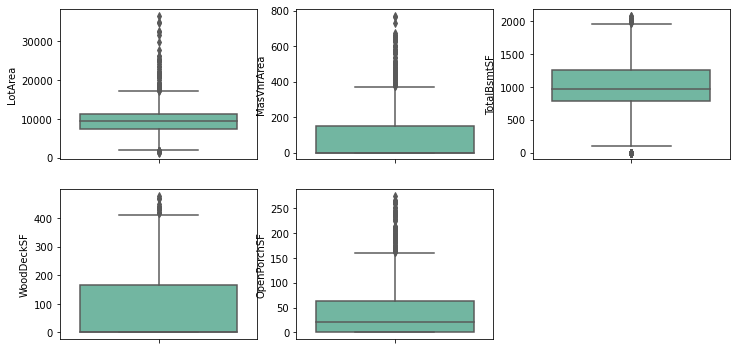

In [32]:
plt.figure(figsize=(12, 16))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set2', data = housedata)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set2', data = housedata)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set2', data = housedata)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set2', data = housedata)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set2', data = housedata)
plt.show()

### Data Visualization

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

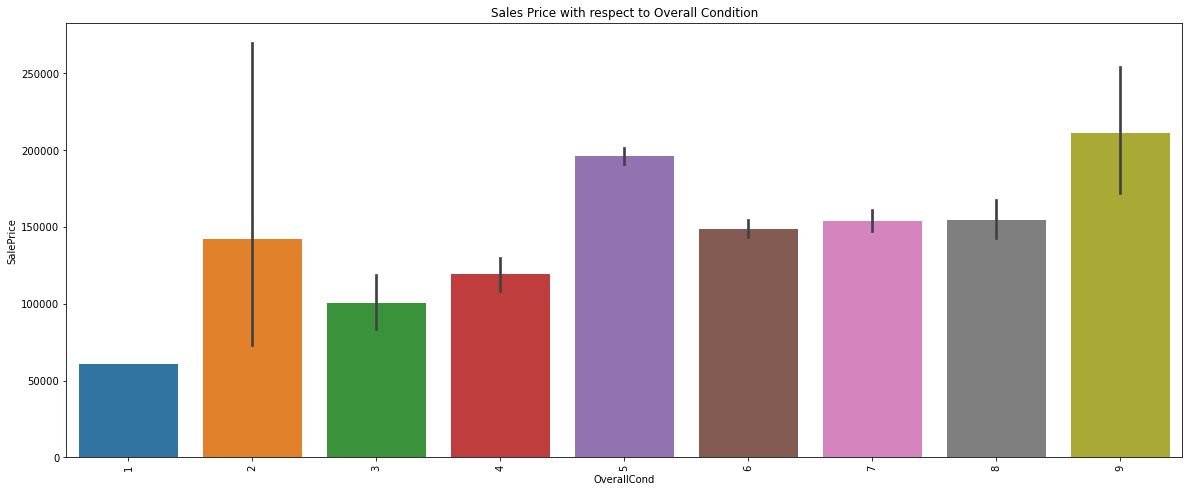

In [33]:
# plot 'overall condition' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= housedata)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

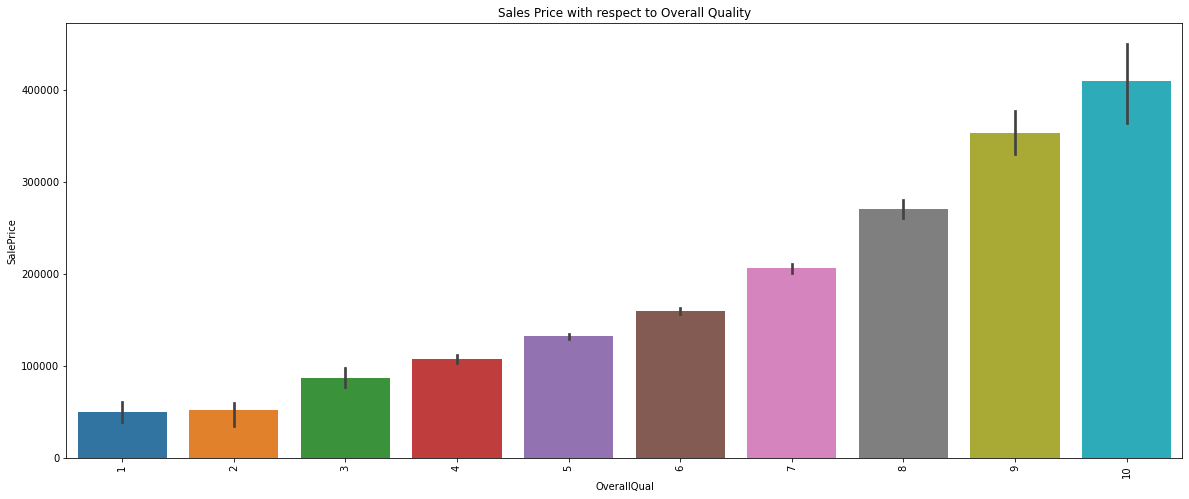

In [34]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= housedata)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

**Salesprice increases with increase in overall quality**

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

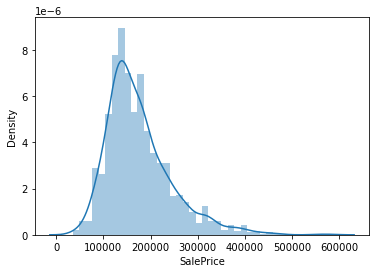

In [35]:
sns.distplot(housedata['SalePrice'])

**Saleprice figures are skewed towards left, we need to apply log transformation to get normal distribution and centralised data**

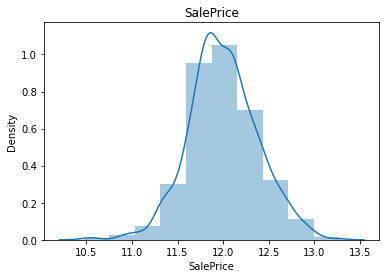

In [36]:

# Visualise the target variable -> SalePrice after transforming the sales price

housedata['SalePrice'] = np.log1p(housedata['SalePrice'])

plt.title('SalePrice')
sns.distplot(housedata['SalePrice'], bins=10)
plt.show()

<Figure size 720x360 with 0 Axes>

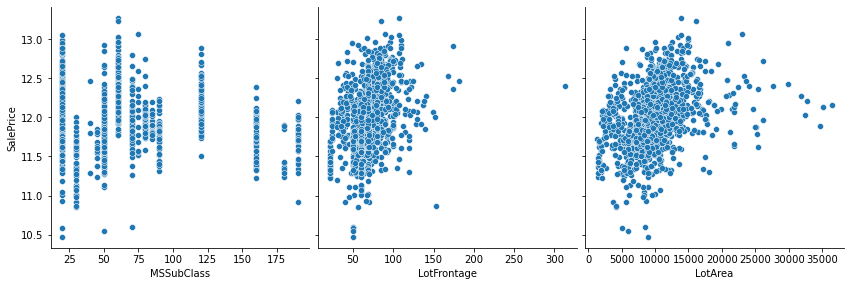

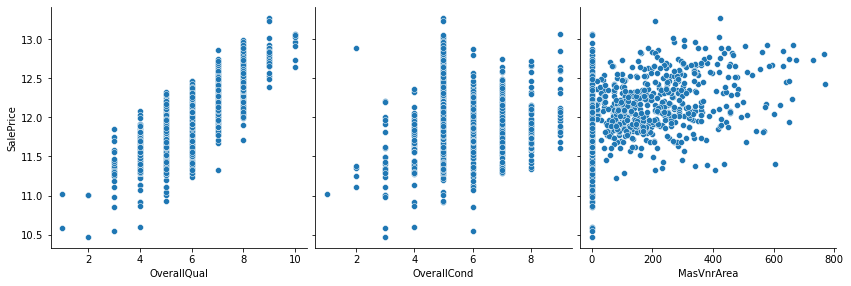

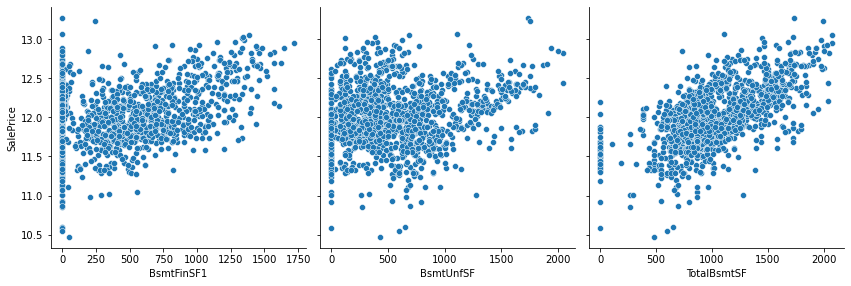

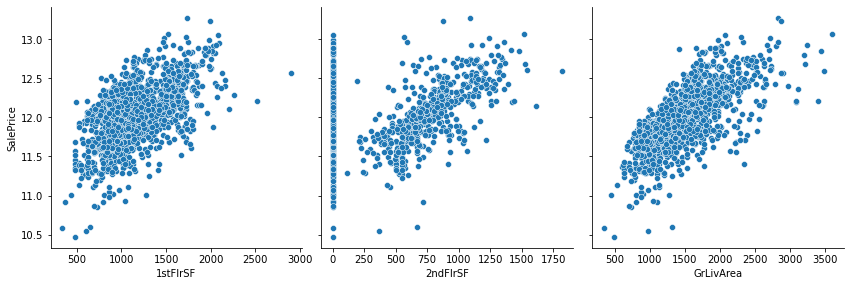

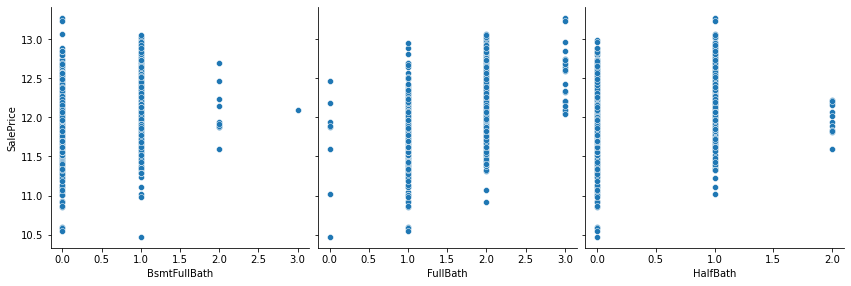

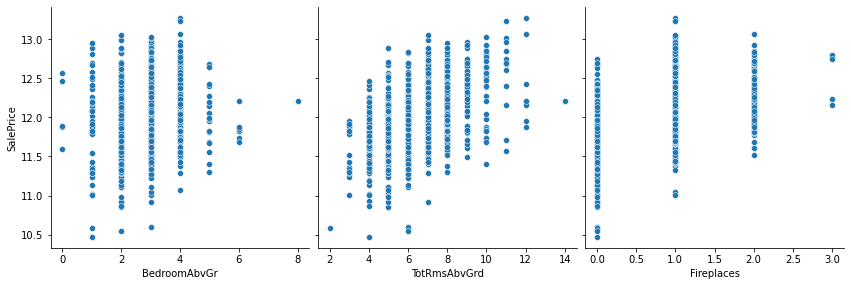

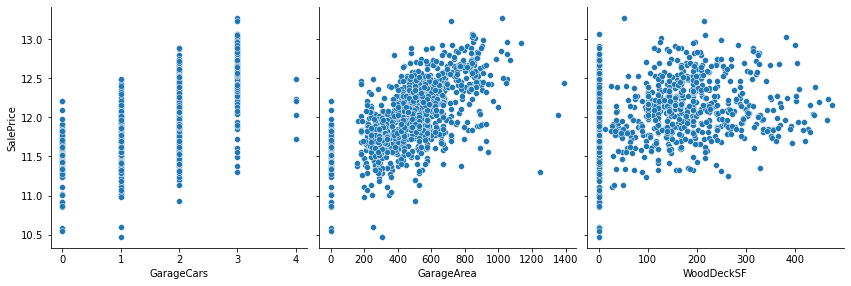

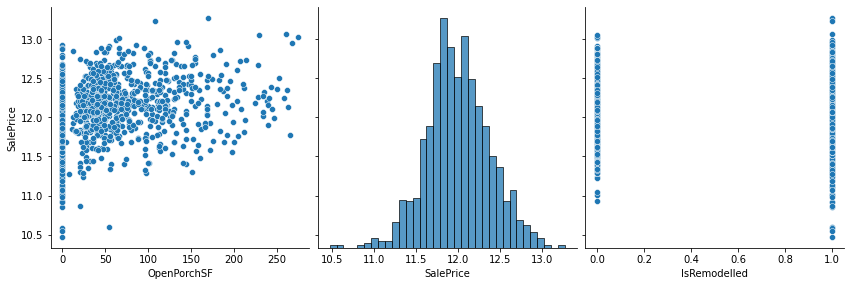

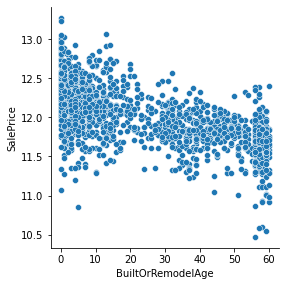

In [37]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(housedata, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housedata, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housedata, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housedata, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housedata, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housedata, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housedata, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housedata, x_vars=['OpenPorchSF','SalePrice', 'IsRemodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housedata, x_vars=['BuiltOrRemodelAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

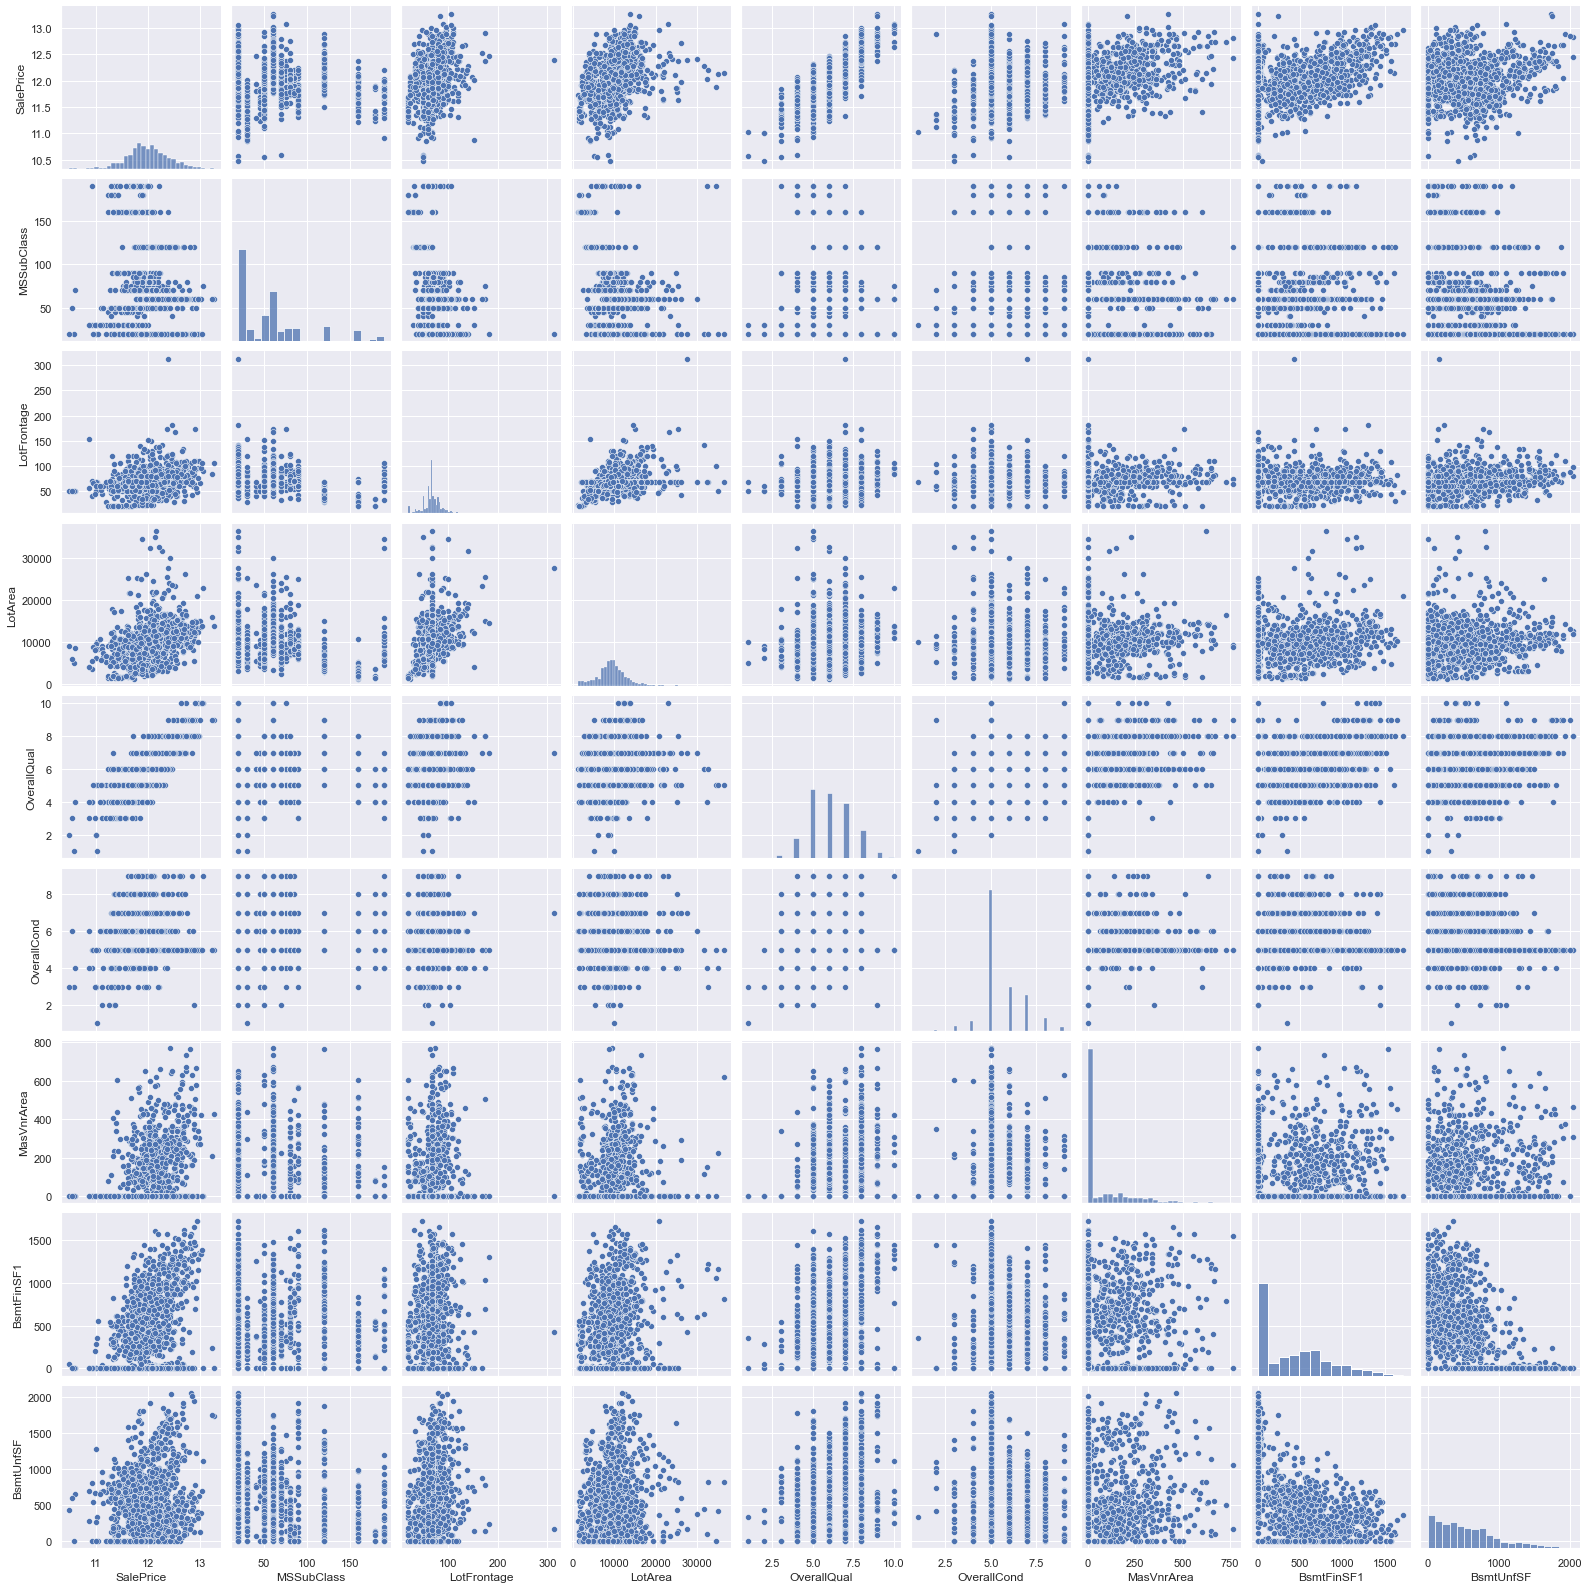

In [38]:
sns.set()
cols1 = ['SalePrice','MSSubClass','LotFrontage','LotArea','OverallQual', 'OverallCond','MasVnrArea','BsmtFinSF1','BsmtUnfSF']
sns.pairplot(housedata[cols1], size = 2.5)
plt.show()

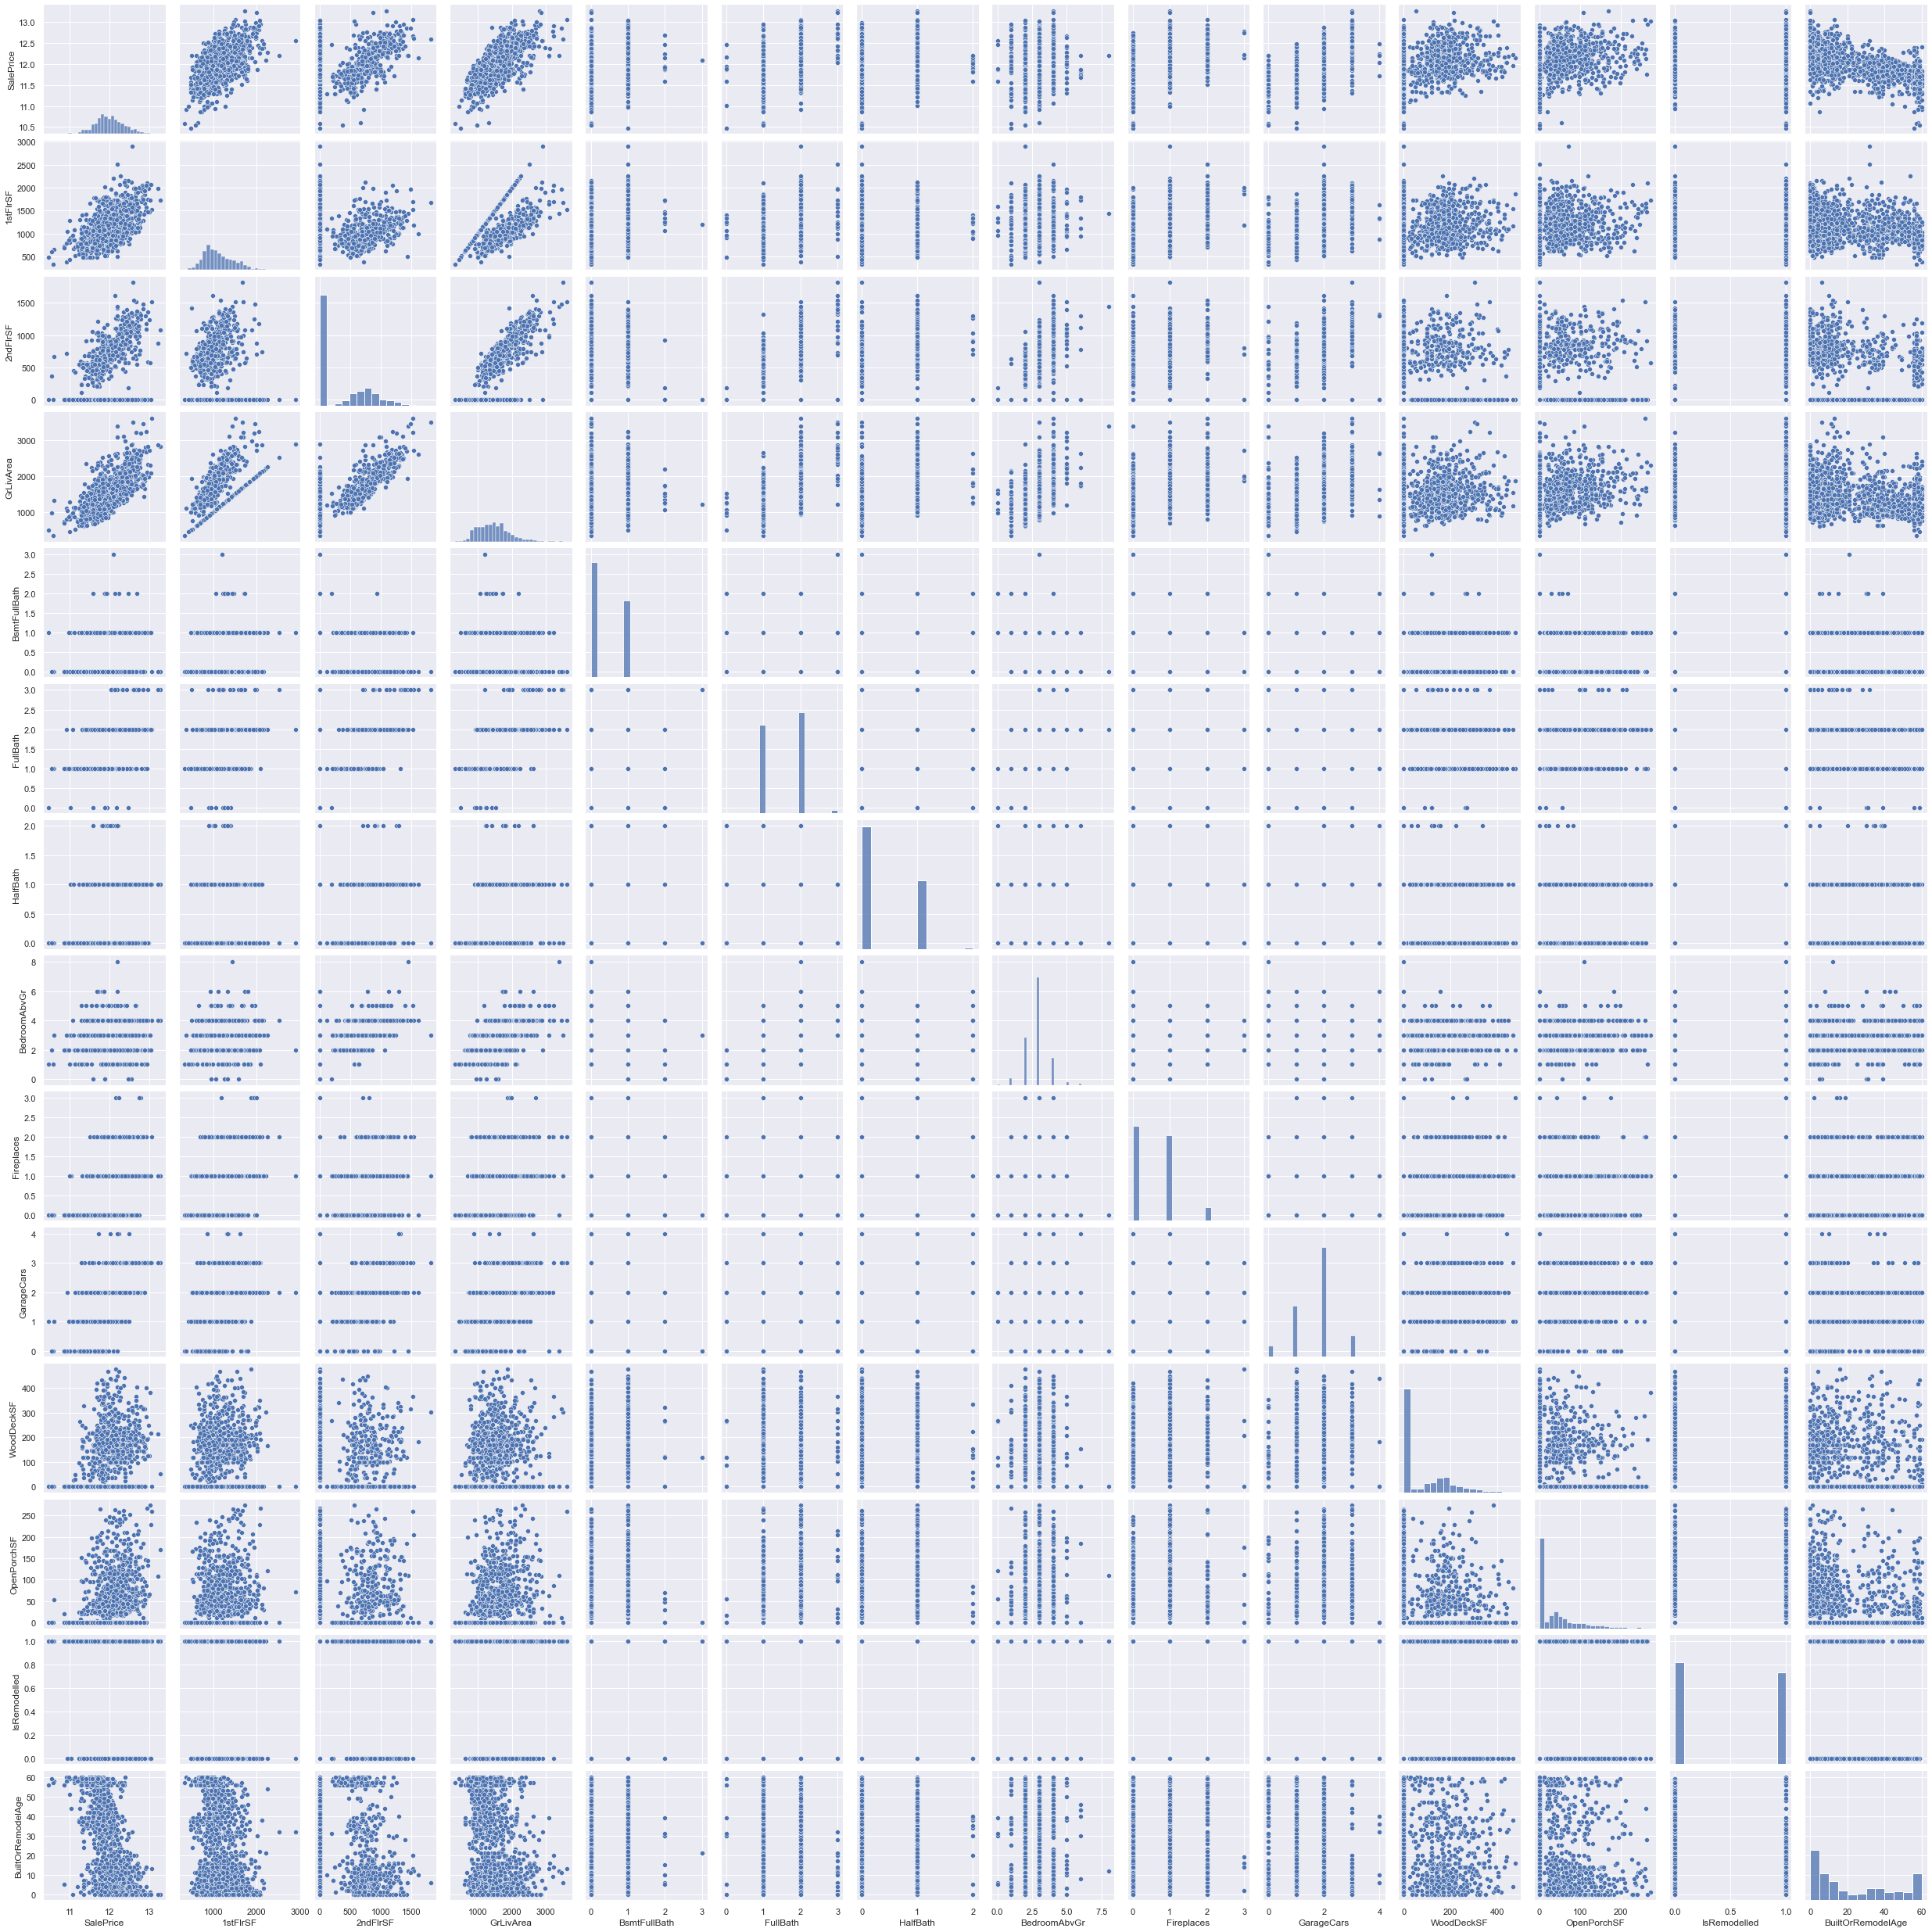

In [39]:
cols2 = ['SalePrice','1stFlrSF','2ndFlrSF', 'GrLivArea','BsmtFullBath','FullBath', 'HalfBath','BedroomAbvGr','Fireplaces','GarageCars','WoodDeckSF','OpenPorchSF','IsRemodelled','BuiltOrRemodelAge']
sns.pairplot(housedata[cols2], size = 2.5)
plt.show()

In [40]:
# Check the correlation of numerical columns
data_numeric = housedata.select_dtypes(include=['float64', 'int64'])
data_numeric = data_numeric.drop(['Id'], axis=1)
cor = data_numeric.corr()
cor

MSSubClass  LotFrontage   LotArea  OverallQual  \
MSSubClass           1.000000    -0.374617 -0.337154     0.055071   
LotFrontage         -0.374617     1.000000  0.526570     0.192895   
LotArea             -0.337154     0.526570  1.000000     0.143750   
OverallQual          0.055071     0.192895  0.143750     1.000000   
OverallCond         -0.061543    -0.045515 -0.031448    -0.092361   
MasVnrArea           0.021910     0.146739  0.106822     0.370467   
BsmtFinSF1          -0.065198     0.106481  0.175271     0.197724   
BsmtUnfSF           -0.135981     0.120751  0.067845     0.284570   
TotalBsmtSF         -0.245046     0.261447  0.285663     0.508555   
1stFlrSF            -0.254665     0.343933  0.394100     0.429985   
2ndFlrSF             0.312277     0.054878  0.092347     0.282174   
GrLivArea            0.097697     0.305304  0.374721     0.563789   
BsmtFullBath         0.010127     0.047374  0.087675     0.102599   
FullBath             0.138842     0.166675  0.168665     0.538074   
HalfBath             0.181354     0.029746  0.075881     0.261635   
BedroomAbvGr        -0.034020     0.254239  0.272548     0.105032   
TotRmsAbvGrd         0.047309     0.302398  0.339464     0.395425   
Fireplaces          -0.036687     0.198997  0.296238     0.377390   
GarageCars          -0.035528     0.260253  0.261297     0.584809   
GarageArea          -0.094503     0.289033  0.303952     0.535209   
WoodDeckSF          -0.023353     0.070218  0.148381     0.215171   
OpenPorchSF         -0.005349     0.115946  0.144569     0.362212   
SalePrice           -0.061875     0.330422  0.357456     0.814700   
PropAge             -0.031461    -0.102709 -0.037193    -0.578352   
IsRemodelled        -0.047685    -0.035045 -0.000542    -0.097408   
BuiltOrRemodelAge   -0.044033    -0.069614 -0.020580    -0.551301   
OldOrNewGarage       0.037293     0.066870 -0.032436     0.560526   

                   OverallCond  MasVnrArea  BsmtFinSF1  BsmtUnfSF  \
MSSubClass           -0.061543    0.021910   -0.065198  -0.135981   
LotFrontage          -0.045515    0.146739    0.106481   0.120751   
LotArea              -0.031448    0.106822    0.175271   0.067845   
OverallQual          -0.092361    0.370467    0.197724   0.284570   
OverallCond           1.000000   -0.128772   -0.031246  -0.141268   
MasVnrArea           -0.128772    1.000000    0.219608   0.088578   
BsmtFinSF1           -0.031246    0.219608    1.000000  -0.555166   
BsmtUnfSF            -0.141268    0.088578   -0.555166   1.000000   
TotalBsmtSF          -0.175148    0.312750    0.434964   0.435409   
1stFlrSF             -0.146293    0.296672    0.357471   0.310469   
2ndFlrSF              0.026625    0.129935   -0.184984  -0.006689   
GrLivArea            -0.080548    0.325052    0.089183   0.224501   
BsmtFullBath         -0.045714    0.089999    0.652618  -0.428303   
FullBath             -0.203267    0.234673    0.027065   0.269277   
HalfBath             -0.054346    0.184299   -0.022513  -0.053388   
BedroomAbvGr          0.011734    0.122015   -0.119026   0.160767   
TotRmsAbvGrd         -0.053899    0.254528   -0.028745   0.237398   
Fireplaces           -0.024781    0.228871    0.212802   0.038305   
GarageCars           -0.186424    0.346158    0.206372   0.200818   
GarageArea           -0.148604    0.349966    0.249115   0.171323   
WoodDeckSF           -0.003137    0.127115    0.197651  -0.036601   
OpenPorchSF          -0.062439    0.178447    0.083477   0.137049   
SalePrice            -0.035359    0.396072    0.362845   0.201757   
PropAge               0.372424   -0.302763   -0.244372  -0.143677   
IsRemodelled          0.309767   -0.152113   -0.120775   0.030972   
BuiltOrRemodelAge    -0.072610   -0.146063   -0.119785  -0.177058   
OldOrNewGarage       -0.283830    0.156261    0.009257   0.338911   

                   TotalBsmtSF  1stFlrSF  ...  Fireplaces  GarageCars  \
MSSubClass           -0.245046 -0.254665  ...   -0.036687   -0.035528   
LotFron

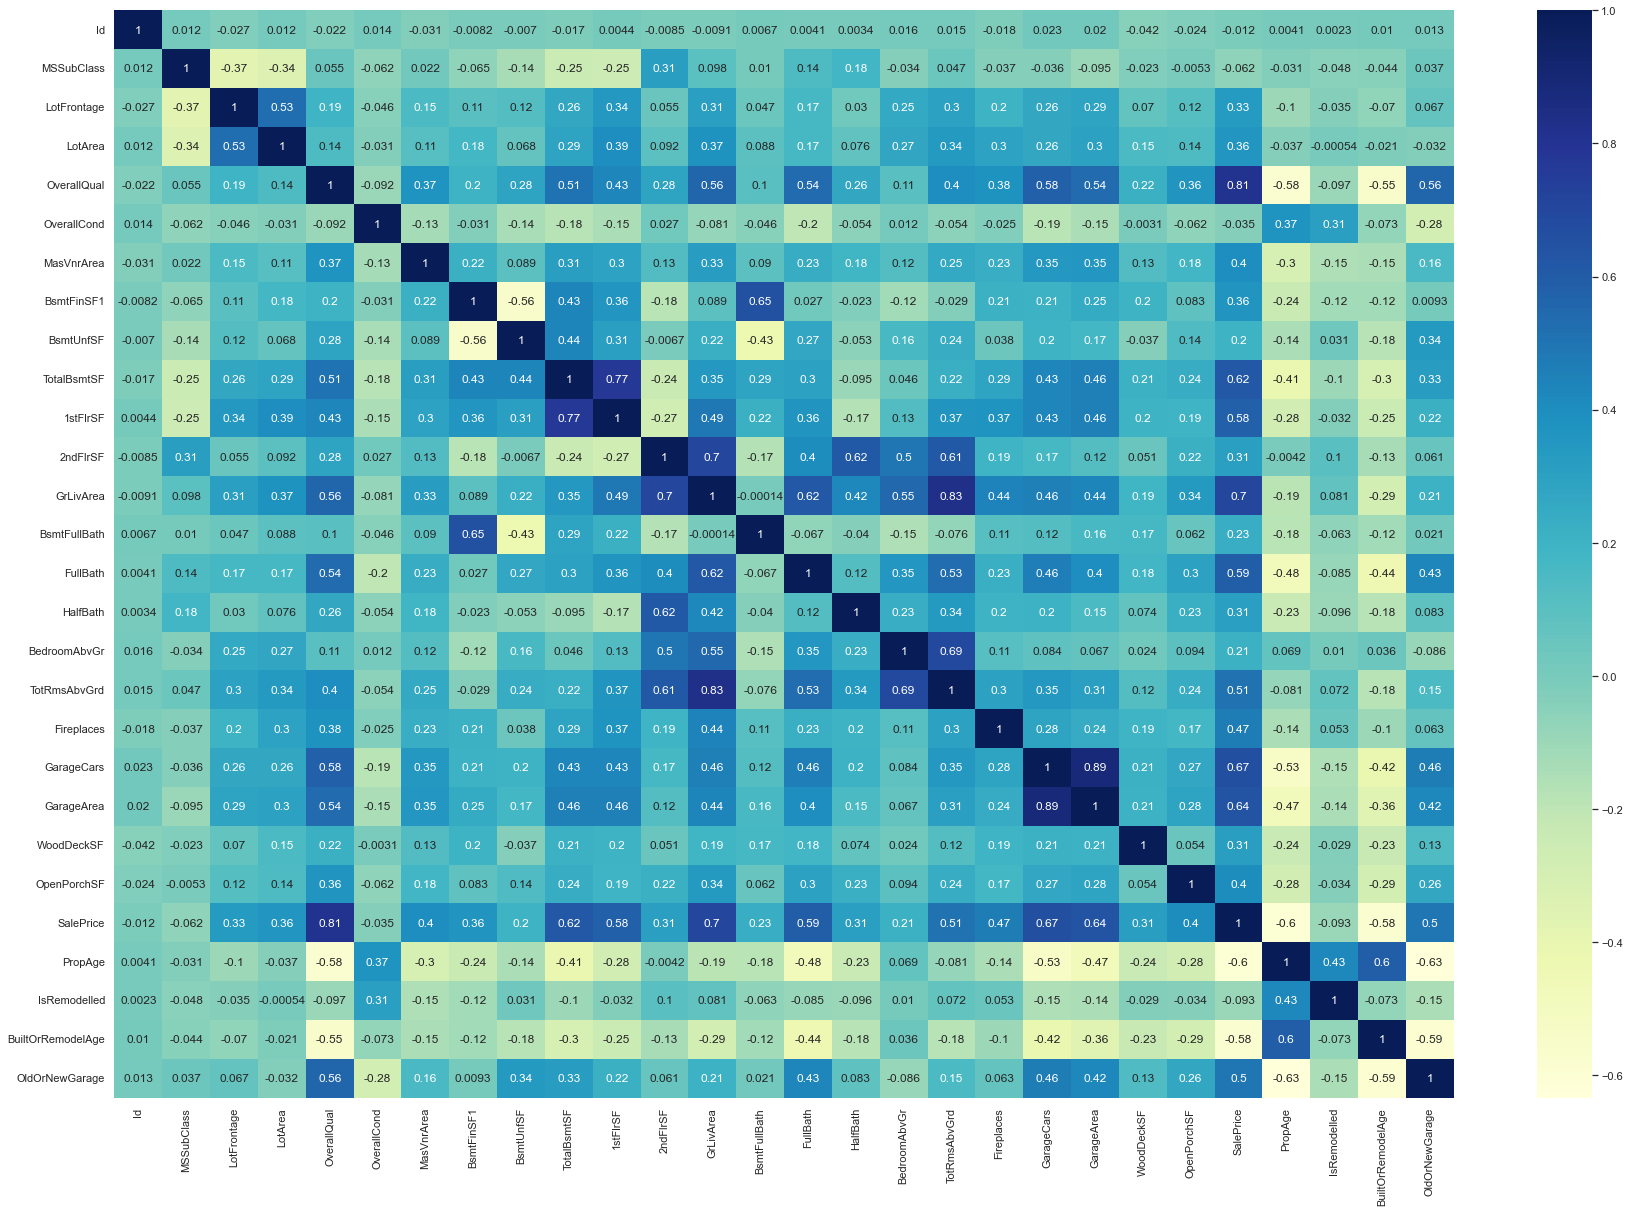

In [41]:
plt.figure(figsize = (30, 20))
sns.heatmap(housedata.corr(), cmap="YlGnBu", annot=True)
plt.show()

##### Removing following columns which shows high correlation
**- TotRmsAbvGrd and GrLivArea show 82%
**- Garage Area and Garage Cars show 88%

In [42]:
# Remove high correlated variables

housedata.drop(['TotRmsAbvGrd', 'GarageCars'], axis = 1, inplace = True)

In [43]:
# Shape dataframe

housedata.shape

(1386, 47)

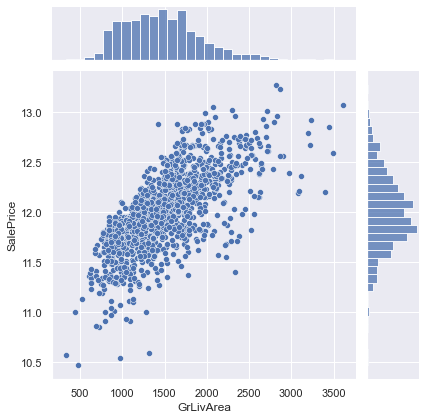

In [44]:
sns.jointplot(x = housedata['GrLivArea'], y = housedata['SalePrice'])
plt.show()

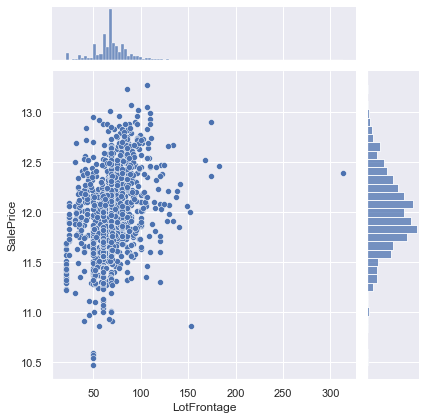

In [45]:
# Lot frontage vs SalePrice 
sns.jointplot(x = housedata['LotFrontage'], y = housedata['SalePrice'])
plt.show()

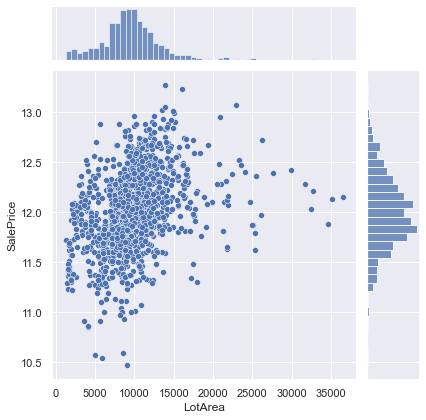

In [46]:
# LotArea vs SalePrice
sns.jointplot(x = housedata['LotArea'], y = housedata['SalePrice'])
plt.show()

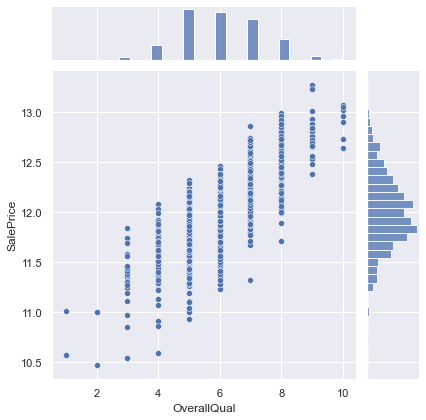

In [47]:
# OverallQual vs SalePrice
sns.jointplot(x = housedata['OverallQual'], y = housedata['SalePrice'])
plt.show()

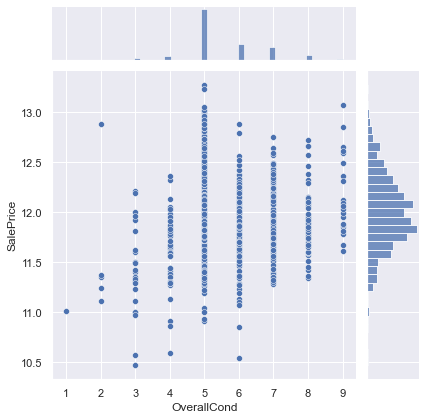

In [48]:
# OverallCond vs SalePrice
sns.jointplot(x=housedata['OverallCond'], y = housedata['SalePrice'])
plt.show()

**Ground or First level houses has a steady increase**

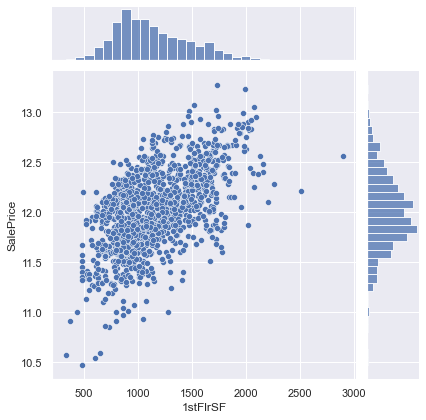

In [49]:
# 1stFlrSF vs SalePrice
sns.jointplot(x = housedata['1stFlrSF'], y = housedata['SalePrice'])
plt.show()

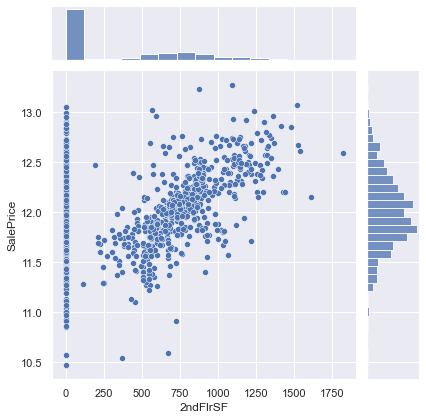

In [50]:
# 2ndFlrSF vs SalePrice
sns.jointplot(x = housedata['2ndFlrSF'], y = housedata['SalePrice'])
plt.show()

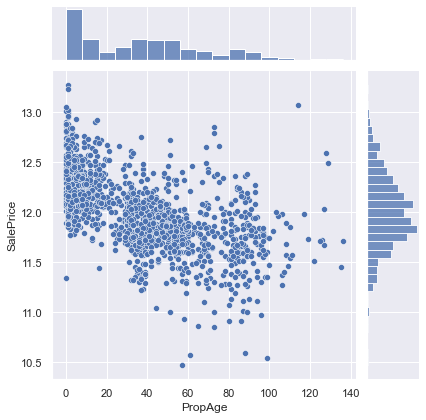

In [51]:
# PropAge vs SalePrice
sns.jointplot(x = housedata['PropAge'], y = housedata['SalePrice'])
plt.show()

**Increase in Property Age shows a decrease in saleprice trend**

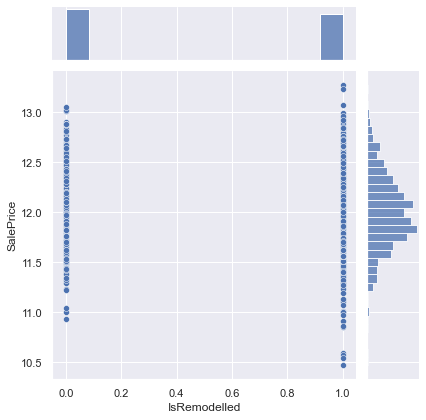

In [52]:
# IsRemodelled vs SalePrice

sns.jointplot(x = housedata['IsRemodelled'], y = housedata['SalePrice'])
plt.show()

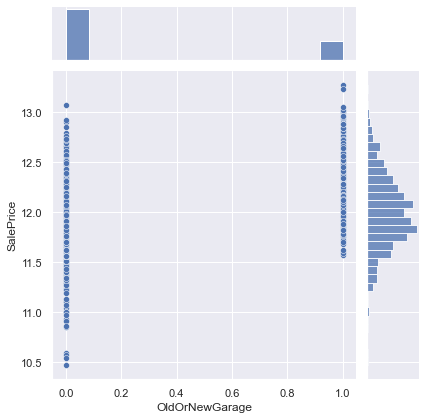

In [53]:
# OldOrNewGarage vs SalePrice

sns.jointplot(x = housedata['OldOrNewGarage'], y = housedata['SalePrice'])
plt.show()

#### Data Preparation
**Converting categorical data into numercal data by means of creating Dummies**

In [54]:
#type of each feature in data: int, float, object
types = housedata.dtypes
#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)] 
#categorical values are type object
categorical_type = types[types == object]

#Numerical columns

numerical_columns = list(numeric_type.index)
print(numerical_columns)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'PropAge', 'IsRemodelled', 'BuiltOrRemodelAge', 'OldOrNewGarage']


In [55]:
#Categorical columns
categorical_columns = list(categorical_type.index)
print(categorical_columns)

['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'SaleCondition']


In [56]:
# Ordered list assign value in sequence; for unordered list assign and arrange values as 0 and 1

housedata['d_LotShape'] = housedata['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
housedata['d_ExterQual'] = housedata['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
housedata['d_BsmtQual'] = housedata['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housedata['d_BsmtExposure'] = housedata['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
housedata['d_BsmtFinType1'] = housedata['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
housedata['d_HeatingQC'] = housedata['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housedata['d_KitchenQual'] = housedata['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housedata['d_FireplaceQu'] = housedata['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housedata['d_GarageFinish'] = housedata['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
housedata['d_BldgType'] = housedata['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
housedata['d_HouseStyle'] = housedata['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })

housedata['d_LotConfig'] = housedata['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
housedata['d_MasVnrType'] = housedata['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
housedata['d_SaleCondition'] = housedata['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
housedata.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood BldgType HouseStyle  ...  d_BsmtFinType1  d_HeatingQC  \
0      CollgCr     1Fam     2Story  ...               6            5   
1      Veenker     1Fam     1Story  ...               5            5   
2      CollgCr     1Fam     2Story  ...               6            5   
3      Crawfor     1Fam     2Story  ...               5            4   
4      NoRidge     1Fam     2Story  ...               6            5   

  d_KitchenQual d_FireplaceQu d_GarageFinish d_BldgType  d_HouseStyle  \
0             4             0              2          1             4   
1             3             3              2          1             1   
2             4             3              2          1             4   
3             4             4              1          1             4   
4             4             3              2          1             4   

  d_LotConfig d_MasVnrType d_SaleCondition  
0           5            1               1  
1           2            0               1  
2           5            1               1  
3           4            0               0  
4           2            1               1  

[5 rows x 61 columns]

In [57]:
# We have new derived columns to use and drop the old columns with ID column which has no use

housedata = housedata.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

housedata.head()

MSSubClass MSZoning  LotFrontage  LotArea Neighborhood  OverallQual  \
0          60       RL         65.0     8450      CollgCr            7   
1          20       RL         80.0     9600      Veenker            6   
2          60       RL         68.0    11250      CollgCr            7   
3          70       RL         60.0     9550      Crawfor            7   
4          60       RL         84.0    14260      NoRidge            8   

   OverallCond RoofStyle Exterior1st Exterior2nd  ...  d_BsmtFinType1  \
0            5     Gable     VinylSd     VinylSd  ...               6   
1            8     Gable     MetalSd     MetalSd  ...               5   
2            5     Gable     VinylSd     VinylSd  ...               6   
3            5     Gable     Wd Sdng     Wd Shng  ...               5   
4            5     Gable     VinylSd     VinylSd  ...               6   

  d_HeatingQC  d_KitchenQual  d_FireplaceQu  d_GarageFinish  d_BldgType  \
0           5              4              0               2           1   
1           5              3              3               2           1   
2           5              4              3               2           1   
3           4              4              4               1           1   
4           5              4              3               2           1   

   d_HouseStyle  d_LotConfig  d_MasVnrType  d_SaleCondition  
0             4            5             1                1  
1             1            2             0                1  
2             4            5             1                1  
3             4            4             0                0  
4             4            2             1                1  

[5 rows x 46 columns]

In [58]:
# For the following columns create dummies

# Creating dummies for MSZoning

d_MSZoning = pd.get_dummies(housedata['MSZoning'], prefix='MSZoning', drop_first = True)
housedata = pd.concat([housedata, d_MSZoning], axis = 1)

# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(housedata['Neighborhood'], prefix='Neighborhood', drop_first = True)
housedata = pd.concat([housedata, d_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

d_RoofStyle = pd.get_dummies(housedata['RoofStyle'], prefix='RoofStyle', drop_first = True)
housedata = pd.concat([housedata, d_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(housedata['Exterior1st'], prefix='Exterior1st', drop_first = True)
housedata = pd.concat([housedata, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(housedata['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
housedata = pd.concat([housedata, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(housedata['Foundation'], prefix='Foundation', drop_first = True)
housedata = pd.concat([housedata, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(housedata['GarageType'], prefix='GarageType', drop_first = True)
housedata = pd.concat([housedata, d_GarageType], axis = 1)

housedata.head()

MSSubClass MSZoning  LotFrontage  LotArea Neighborhood  OverallQual  \
0          60       RL         65.0     8450      CollgCr            7   
1          20       RL         80.0     9600      Veenker            6   
2          60       RL         68.0    11250      CollgCr            7   
3          70       RL         60.0     9550      Crawfor            7   
4          60       RL         84.0    14260      NoRidge            8   

   OverallCond RoofStyle Exterior1st Exterior2nd  ...  Foundation_PConc  \
0            5     Gable     VinylSd     VinylSd  ...                 1   
1            8     Gable     MetalSd     MetalSd  ...                 0   
2            5     Gable     VinylSd     VinylSd  ...                 1   
3            5     Gable     Wd Sdng     Wd Shng  ...                 0   
4            5     Gable     VinylSd     VinylSd  ...                 1   

  Foundation_Slab  Foundation_Stone  Foundation_Wood  GarageType_Attchd  \
0               0                 0                0                  1   
1               0                 0                0                  1   
2               0                 0                0                  1   
3               0                 0                0                  0   
4               0                 0                0                  1   

   GarageType_Basment  GarageType_BuiltIn  GarageType_CarPort  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   GarageType_Detchd  GarageType_None  
0                  0                0  
1                  0                0  
2                  0                0  
3                  1                0  
4                  0                0  

[5 rows x 119 columns]

In [59]:
# drop the below columns as we now have new columns derived from these columns

housedata = housedata.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

housedata.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  Foundation_PConc  \
0         706        150          856       856  ...                 1   
1         978        284         1262      1262  ...                 0   
2         486        434          920       920  ...                 1   
3         216        540          756       961  ...                 0   
4         655        490         1145      1145  ...                 1   

   Foundation_Slab  Foundation_Stone  Foundation_Wood  GarageType_Attchd  \
0                0                 0                0                  1   
1                0                 0                0                  1   
2                0                 0                0                  1   
3                0                 0                0                  0   
4                0                 0                0                  1   

   GarageType_Basment  GarageType_BuiltIn  GarageType_CarPort  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   GarageType_Detchd  GarageType_None  
0                  0                0  
1                  0                0  
2                  0                0  
3                  1                0  
4                  0                0  

[5 rows x 112 columns]

In [60]:
housedata = pd.get_dummies(housedata, drop_first=True )
housedata.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  Foundation_PConc  \
0         706        150          856       856  ...                 1   
1         978        284         1262      1262  ...                 0   
2         486        434          920       920  ...                 1   
3         216        540          756       961  ...                 0   
4         655        490         1145      1145  ...                 1   

   Foundation_Slab  Foundation_Stone  Foundation_Wood  GarageType_Attchd  \
0                0                 0                0                  1   
1                0                 0                0                  1   
2                0                 0                0                  1   
3                0                 0                0                  0   
4                0                 0                0                  1   

   GarageType_Basment  GarageType_BuiltIn  GarageType_CarPort  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   GarageType_Detchd  GarageType_None  
0                  0                0  
1                  0                0  
2                  0                0  
3                  1                0  
4                  0                0  

[5 rows x 112 columns]

In [61]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 1458
Columns: 112 entries, MSSubClass to GarageType_None
dtypes: float64(3), int64(36), uint8(73)
memory usage: 564.2 KB


### Train Test Split

In [62]:
# Putting all feature variable to X

X = housedata.drop(['SalePrice'], axis=1)
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  Foundation_PConc  \
0         706        150          856       856  ...                 1   
1         978        284         1262      1262  ...                 0   
2         486        434          920       920  ...                 1   
3         216        540          756       961  ...                 0   
4         655        490         1145      1145  ...                 1   

   Foundation_Slab  Foundation_Stone  Foundation_Wood  GarageType_Attchd  \
0                0                 0                0                  1   
1                0                 0                0                  1   
2                0                 0                0                  1   
3                0                 0                0                  0   
4                0                 0                0                  1   

   GarageType_Basment  GarageType_BuiltIn  GarageType_CarPort  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   GarageType_Detchd  GarageType_None  
0                  0                0  
1                  0                0  
2                  0                0  
3                  1                0  
4                  0                0  

[5 rows x 111 columns]

In [63]:
# Putting response variable to y

y = housedata['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [64]:
# scaling the features

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=111)

In [65]:
# split into train and test

from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

### Recursive feature elimination (RFE)

In [66]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE

rfe = RFE(estimator=lm, n_features_to_select=50)
rfe = rfe.fit(X_train, y_train)

In [67]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 7),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 38),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', False, 2),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('FullBath', False, 25),
 ('HalfBath', False, 24),
 ('BedroomAbvGr', False, 54),
 ('Fireplaces', False, 55),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', True, 1),
 ('PropAge', True, 1),
 ('IsRemodelled', False, 20),
 ('BuiltOrRemodelAge', True, 1),
 ('OldOrNewGarage', False, 18),
 ('d_LotShape', False, 32),
 ('d_ExterQual', False, 14),
 ('d_BsmtQual', False, 60),
 ('d_BsmtExposure', True, 1),
 ('d_BsmtFinType1', False, 23),
 ('d_HeatingQC', True, 1),
 ('d_KitchenQual', True, 1),
 ('d_FireplaceQu', True, 1),
 ('d_GarageFinish', True, 1),
 ('d_BldgType', True, 1),
 ('d_HouseStyle', False, 13),
 ('d_LotConfig', False, 51),
 ('d_Ma

In [68]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

Variable  rfe_support  rfe_ranking
0            LotFrontage         True            1
1                LotArea         True            1
2            OverallQual         True            1
3            OverallCond         True            1
4             BsmtFinSF1         True            1
5            TotalBsmtSF         True            1
6               1stFlrSF         True            1
7               2ndFlrSF         True            1
8              GrLivArea         True            1
9           BsmtFullBath         True            1
10            GarageArea         True            1
11            WoodDeckSF         True            1
12           OpenPorchSF         True            1
13               PropAge         True            1
14     BuiltOrRemodelAge         True            1
15        d_BsmtExposure         True            1
16           d_HeatingQC         True            1
17         d_KitchenQual         True            1
18         d_FireplaceQu         True            1
19        d_GarageFinish         True            1
20            d_BldgType         True            1
21          d_MasVnrType         True            1
22       d_SaleCondition         True            1
23           MSZoning_FV         True            1
24           MSZoning_RH         True            1
25           MSZoning_RL         True            1
26           MSZoning_RM         True            1
27  Neighborhood_Crawfor         True            1
28  Neighborhood_MeadowV         True            1
29  Neighborhood_NridgHt         True            1
30  Neighborhood_OldTown         True            1
31  Neighborhood_StoneBr         True            1
32     RoofStyle_Gambrel         True            1
33   Exterior1st_BrkComm         True            1
34   Exterior1st_BrkFace         True            1
35    Exterior1st_CBlock         True            1
36   Exterior1st_CemntBd         True            1
37   Exterior1st_MetalSd         True            1
38    Exterior1st_Stucco         True            1
39   Exterior2nd_Brk Cmn         True            1
40    Exterior2nd_CBlock         True            1
41   Exterior2nd_Plywood         True            1
42   Exterior2nd_VinylSd         True            1
43      Foundation_PConc         True            1
44      Foundation_Stone         True            1
45     GarageType_Attchd         True            1
46    GarageType_Basment         True            1
47    GarageType_BuiltIn         True            1
48     GarageType_Detchd         True            1
49       GarageType_None         True            1

In [69]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [70]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

### Model Building and Evaluation

In [71]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [72]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
19         8.0         -0.073309        -0.080930                1
18         7.0         -0.073274        -0.080934                2
20         9.0         -0.073344        -0.080936                3
17         6.0         -0.073237        -0.080939                4
16         5.0         -0.073196        -0.080943                5
15         4.0         -0.073158        -0.080948                6
21        10.0         -0.073380        -0.080952                7
14         3.0         -0.073124        -0.080957                8
13         2.0         -0.073088        -0.080991                9
12         1.0         -0.073066        -0.081046               10
11         0.9         -0.073065        -0.081052               11
10         0.8         -0.073064        -0.081059               12
9          0.7         -0.073064        -0.081067               13
8          0.6         -0.073063        -0.081074               14
7          0.5         -0.073064        -0.081082               15
22          20         -0.073652        -0.081084               16
6          0.4         -0.073064        -0.081091               17
5          0.3         -0.073065        -0.081101               18
4          0.2         -0.073065        -0.081111               19
3          0.1         -0.073066        -0.081122               20
2         0.01         -0.073068        -0.081132               21
1        0.001         -0.073068        -0.081133               22
0       0.0001         -0.073068        -0.081133               23
23          50         -0.074271        -0.081242               24
24         100         -0.075333        -0.081718               25
25         500         -0.084282        -0.088759               26

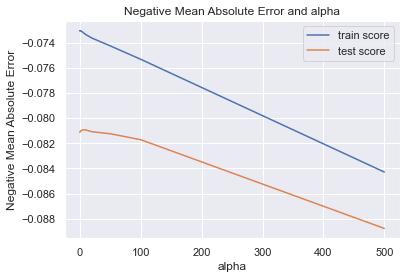

In [73]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [74]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=8.0)

In [75]:
# check the coefficient values with lambda = 8

alpha = 8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.00853623,  0.02034191,  0.07573917,  0.04863549,  0.0314692 ,
        0.04481704,  0.03921617,  0.05324377,  0.06531051,  0.01287437,
        0.01903808,  0.01304702,  0.0080351 , -0.06290891, -0.01156351,
        0.01646928,  0.01139189,  0.01345062,  0.01674071,  0.00823282,
       -0.01751419,  0.00709718,  0.01723177,  0.05152696,  0.02205462,
        0.07626683,  0.05408988,  0.01904921, -0.01147397,  0.02095338,
       -0.01033721,  0.01595151,  0.00722619, -0.02481224,  0.02168046,
       -0.00089412,  0.00767951,  0.0120497 ,  0.00634477,  0.0087044 ,
       -0.00089412,  0.01085712,  0.01205628,  0.02430009,  0.00590029,
        0.043909  ,  0.00326964,  0.019404  ,  0.03747784,  0.00040412])

In [76]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.015872350591975296

In [77]:
X_train_rfe.shape

(970, 50)

In [78]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

Features  Coefficient
0            LotFrontage       0.0085
1                LotArea       0.0203
2            OverallQual       0.0757
3            OverallCond       0.0486
4             BsmtFinSF1       0.0315
5            TotalBsmtSF       0.0448
6               1stFlrSF       0.0392
7               2ndFlrSF       0.0532
8              GrLivArea       0.0653
9           BsmtFullBath       0.0129
10            GarageArea       0.0190
11            WoodDeckSF       0.0130
12           OpenPorchSF       0.0080
13               PropAge      -0.0629
14     BuiltOrRemodelAge      -0.0116
15        d_BsmtExposure       0.0165
16           d_HeatingQC       0.0114
17         d_KitchenQual       0.0135
18         d_FireplaceQu       0.0167
19        d_GarageFinish       0.0082
20            d_BldgType      -0.0175
21          d_MasVnrType       0.0071
22       d_SaleCondition       0.0172
23           MSZoning_FV       0.0515
24           MSZoning_RH       0.0221
25           MSZoning_RL       0.0763
26           MSZoning_RM       0.0541
27  Neighborhood_Crawfor       0.0190
28  Neighborhood_MeadowV      -0.0115
29  Neighborhood_NridgHt       0.0210
30  Neighborhood_OldTown      -0.0103
31  Neighborhood_StoneBr       0.0160
32     RoofStyle_Gambrel       0.0072
33   Exterior1st_BrkComm      -0.0248
34   Exterior1st_BrkFace       0.0217
35    Exterior1st_CBlock      -0.0009
36   Exterior1st_CemntBd       0.0077
37   Exterior1st_MetalSd       0.0120
38    Exterior1st_Stucco       0.0063
39   Exterior2nd_Brk Cmn       0.0087
40    Exterior2nd_CBlock      -0.0009
41   Exterior2nd_Plywood       0.0109
42   Exterior2nd_VinylSd       0.0121
43      Foundation_PConc       0.0243
44      Foundation_Stone       0.0059
45     GarageType_Attchd       0.0439
46    GarageType_Basment       0.0033
47    GarageType_BuiltIn       0.0194
48     GarageType_Detchd       0.0375
49       GarageType_None       0.0004

In [79]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'LotFrontage': 0.0085,
 'LotArea': 0.0203,
 'OverallQual': 0.0757,
 'OverallCond': 0.0486,
 'BsmtFinSF1': 0.0315,
 'TotalBsmtSF': 0.0448,
 '1stFlrSF': 0.0392,
 '2ndFlrSF': 0.0532,
 'GrLivArea': 0.0653,
 'BsmtFullBath': 0.0129,
 'GarageArea': 0.019,
 'WoodDeckSF': 0.013,
 'OpenPorchSF': 0.008,
 'PropAge': -0.0629,
 'BuiltOrRemodelAge': -0.0116,
 'd_BsmtExposure': 0.0165,
 'd_HeatingQC': 0.0114,
 'd_KitchenQual': 0.0135,
 'd_FireplaceQu': 0.0167,
 'd_GarageFinish': 0.0082,
 'd_BldgType': -0.0175,
 'd_MasVnrType': 0.0071,
 'd_SaleCondition': 0.0172,
 'MSZoning_FV': 0.0515,
 'MSZoning_RH': 0.0221,
 'MSZoning_RL': 0.0763,
 'MSZoning_RM': 0.0541,
 'Neighborhood_Crawfor': 0.019,
 'Neighborhood_MeadowV': -0.0115,
 'Neighborhood_NridgHt': 0.021,
 'Neighborhood_OldTown': -0.0103,
 'Neighborhood_StoneBr': 0.016,
 'RoofStyle_Gambrel': 0.0072,
 'Exterior1st_BrkComm': -0.0248,
 'Exterior1st_BrkFace': 0.0217,
 'Exterior1st_CBlock': -0.0009,
 'Exterior1st_CemntBd': 0.0077,
 'Exterior1st_MetalSd': 0.0

In [80]:
# RFE
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(estimator=lm, n_features_to_select=15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [81]:
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

0.9279881116491433
0.8894205276152978
RMSE : 0.12579151007418968


In [82]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

Features  rfe_support  rfe_ranking  Coefficient
12  MSZoning_RL         True            1       0.0763
1   OverallQual         True            1       0.0757
7     GrLivArea         True            1       0.0653
13  MSZoning_RM         True            1       0.0541
6      2ndFlrSF         True            1       0.0532
11  MSZoning_FV         True            1       0.0515
2   OverallCond         True            1       0.0486
4   TotalBsmtSF         True            1       0.0448
5      1stFlrSF         True            1       0.0392
3    BsmtFinSF1         True            1       0.0315

**Graph below displays the top 10 significant variables based on the Ridge Regression model to predict the price of a house.**

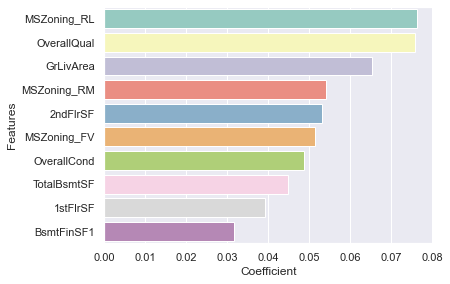

In [83]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set3', data = temp1_df)
plt.show()

In [84]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [85]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
0       0.0001         -0.073071        -0.081151                1
1       0.0002         -0.073124        -0.081187                2
2       0.0003         -0.073202        -0.081219                3
3       0.0004         -0.073297        -0.081277                4
4       0.0005         -0.073376        -0.081342                5
5        0.001         -0.074057        -0.081704                6
6        0.002         -0.074966        -0.082098                7
7        0.003         -0.075597        -0.082313                8
8        0.004         -0.076278        -0.082371                9
9        0.005         -0.077045        -0.082575               10
10        0.01         -0.081151        -0.085297               11

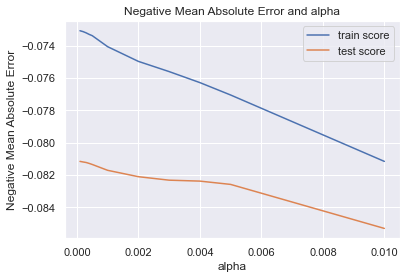

In [86]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [87]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

In [88]:
# check the coefficient values with lambda = 0.0001

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 8.43582244e-03,  2.08257081e-02,  7.52719472e-02,  4.85390824e-02,
        3.12381487e-02,  4.54256288e-02,  3.86822747e-02,  5.32255579e-02,
        6.62064554e-02,  1.27779319e-02,  1.99086273e-02,  1.29506344e-02,
        7.74241791e-03, -6.36911951e-02, -1.11797815e-02,  1.68446354e-02,
        1.13411738e-02,  1.27785473e-02,  1.65603106e-02,  8.24642045e-03,
       -1.75915695e-02,  6.69254192e-03,  1.61772433e-02,  6.52616687e-02,
        2.93276906e-02,  1.03005228e-01,  7.78458240e-02,  1.90550767e-02,
       -1.14251522e-02,  2.12282213e-02, -1.05107536e-02,  1.60826604e-02,
        7.13129336e-03, -2.51598567e-02,  2.16222210e-02, -1.70859145e-03,
        7.58342898e-03,  1.24788050e-02,  6.12650417e-03,  8.72152815e-03,
       -4.85342578e-07,  1.08111783e-02,  1.19850757e-02,  2.39301630e-02,
        6.58464975e-03,  5.49044898e-02,  6.21775203e-03,  2.45438260e-02,
        4.78035480e-02,  5.94179576e-03])

In [89]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.01575423471268351

In [90]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0            LotFrontage       0.0084
1                LotArea       0.0208
2            OverallQual       0.0753
3            OverallCond       0.0485
4             BsmtFinSF1       0.0312
5            TotalBsmtSF       0.0454
6               1stFlrSF       0.0387
7               2ndFlrSF       0.0532
8              GrLivArea       0.0662
9           BsmtFullBath       0.0128
10            GarageArea       0.0199
11            WoodDeckSF       0.0130
12           OpenPorchSF       0.0077
13               PropAge      -0.0637
14     BuiltOrRemodelAge      -0.0112
15        d_BsmtExposure       0.0168
16           d_HeatingQC       0.0113
17         d_KitchenQual       0.0128
18         d_FireplaceQu       0.0166
19        d_GarageFinish       0.0082
20            d_BldgType      -0.0176
21          d_MasVnrType       0.0067
22       d_SaleCondition       0.0162
23           MSZoning_FV       0.0653
24           MSZoning_RH       0.0293
25           MSZoning_RL       0.1030
26           MSZoning_RM       0.0778
27  Neighborhood_Crawfor       0.0191
28  Neighborhood_MeadowV      -0.0114
29  Neighborhood_NridgHt       0.0212
30  Neighborhood_OldTown      -0.0105
31  Neighborhood_StoneBr       0.0161
32     RoofStyle_Gambrel       0.0071
33   Exterior1st_BrkComm      -0.0252
34   Exterior1st_BrkFace       0.0216
35    Exterior1st_CBlock      -0.0017
36   Exterior1st_CemntBd       0.0076
37   Exterior1st_MetalSd       0.0125
38    Exterior1st_Stucco       0.0061
39   Exterior2nd_Brk Cmn       0.0087
40   Exterior2nd_Plywood       0.0108
41   Exterior2nd_VinylSd       0.0120
42      Foundation_PConc       0.0239
43      Foundation_Stone       0.0066
44     GarageType_Attchd       0.0549
45    GarageType_Basment       0.0062
46    GarageType_BuiltIn       0.0245
47     GarageType_Detchd       0.0478
48       GarageType_None       0.0059

In [91]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotFrontage': 0.008435822442119136,
 'LotArea': 0.02082570814998039,
 'OverallQual': 0.07527194716305641,
 'OverallCond': 0.04853908236918384,
 'BsmtFinSF1': 0.031238148720824355,
 'TotalBsmtSF': 0.045425628788244306,
 '1stFlrSF': 0.03868227473861515,
 '2ndFlrSF': 0.0532255578872686,
 'GrLivArea': 0.06620645537975466,
 'BsmtFullBath': 0.012777931883072241,
 'GarageArea': 0.019908627334991647,
 'WoodDeckSF': 0.01295063439550534,
 'OpenPorchSF': 0.007742417909430334,
 'PropAge': -0.0636911951382462,
 'BuiltOrRemodelAge': -0.011179781533450239,
 'd_BsmtExposure': 0.01684463540681617,
 'd_HeatingQC': 0.011341173751856662,
 'd_KitchenQual': 0.012778547310051283,
 'd_FireplaceQu': 0.016560310557713117,
 'd_GarageFinish': 0.008246420454745315,
 'd_BldgType': -0.017591569454945184,
 'd_MasVnrType': 0.006692541922162572,
 'd_SaleCondition': 0.01617724325411419,
 'MSZoning_FV': 0.0652616687351294,
 'MSZoning_RH': 0.029327690598367425,
 'MSZoning_RL': 0.1030052277058814,
 'MSZoning_RM': 0.07784

In [92]:
#RFE
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(estimator=lm, n_features_to_select=15)            
rfe = rfe.fit(X_train_lasso, y_train)


In [93]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

# lasso regression
lm = Lasso(alpha=0.0001)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

0.9279518736664575
0.8899046025702833
RMSE : 0.12551587434537317


In [94]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

Features  rfe_support  rfe_ranking  Coefficient
12  MSZoning_RL         True            1     0.103005
13  MSZoning_RM         True            1     0.077846
1   OverallQual         True            1     0.075272
7     GrLivArea         True            1     0.066206
11  MSZoning_FV         True            1     0.065262
6      2ndFlrSF         True            1     0.053226
2   OverallCond         True            1     0.048539
4   TotalBsmtSF         True            1     0.045426
5      1stFlrSF         True            1     0.038682
3    BsmtFinSF1         True            1     0.031238

**Graph below displays the top 10 significant variables based on the Lasso Regression model to predict the price of a house.**

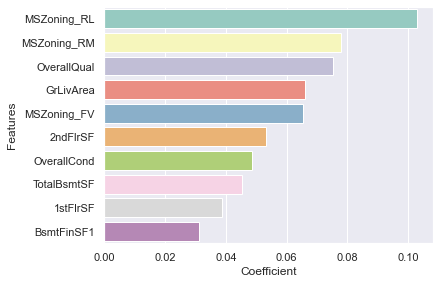

In [95]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set3', data = temp2_df)
plt.show()

### Observation:<br>
**Compared to Ridge the model performance by Lasso Regression was better in terms of R2 values of Train and Test.
Also it is better to use Lasso, as it brings a zero value to insignificant features which allow us to choose
the predictive variables.**


The optimal lambda value are:

Ridge - 8
Lasso - 0.0001

The Root Mean Squared error (RMSE):

Ridge - 0.125791
Lasso - 0.125515



### INFERENCE <br>

Surprise Housing firm has to keep a check on the predictors affecting the price of house.
The higher values of positive coeeficients suggest a high sale value.
Some of those features are:
1. MSZONING (Zoning classification)
2. OverallQual (overall material and finish of the house)
3. GrLivArea (grade above living area square feet)
4. OverallCond (overall condition of the house)
5. TotalBsmtSF / BsmtFinSF1 (Total basement area in square feet and the Basement finished square feet area)